# Market Segmentation with Clustering - Lab

## Introduction

In this lab, we'll use our knowledge of clustering to perform market segmentation on a real-world dataset!

## Objectives

You will be able to:

* Identify and explain what Market Segmentation is, and how clustering can be used for segmentation
* Use clustering algorithms to create and interpret a market segmentation on real-world data

## Getting Started

In this lab, we're going to work with the [Wholesale Customers Dataset] from the UCI Machine Learning Datasets Repository. This dataset contains data on wholesale purchasing information from real businesses. These businesses range from small cafes and hotels to grocery stores and other retailers. 

Here's the data dictionary for this dataset:

|      Column      |                                               Description                                              |
|:----------------:|:------------------------------------------------------------------------------------------------------:|
|       FRESH      |                    Annual spending on fresh products, such as fruits and vegetables                    |
|       MILK       |                               Annual spending on milk and dairy products                               |
|      GROCERY     |                                   Annual spending on grocery products                                  |
|      FROZEN      |                                   Annual spending on frozen products                                   |
| DETERGENTS_PAPER |                  Annual spending on detergents, cleaning supplies, and paper products                  |
|   DELICATESSEN   |                           Annual spending on meats and delicatessen products                           |
|      CHANNEL     | Type of customer.  1=Hotel/Restaurant/Cafe, 2=Retailer. (This is what we'll use clustering to predict) |
|      REGION      |            Region of Portugal that the customer is located in. (This column will be dropped)           |



One benefit of working with this dataset for practice with segmentation is that we actually have the ground-truth labels of what market segment each customer actually belongs to. For this reason, we'll borrow some methodology from Supervised Learning and store these labels separately, so that we can use them afterwards to check how well our clustering segmentation actually performed. 

Let's get started by importing everything we'll need.

In the cell below:

* Import pandas, numpy, and matplotlib.pyplot, and set the standard alias for each. 
* Use numpy to set a random seed of `0`.
* Set all matplotlib visualizations to appear inline.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline

Now, let's load our data and inspect it. You'll find the data stored in `wholesale_customers_data.csv`. 

In the cell below, load the data into a DataFrame and then display the head to ensure everything loaded correctly.

In [3]:
raw_df = pd.read_csv('wholesale_customers_data.csv')

In [4]:
raw_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Now, let's go ahead and store the `'Channel'` column in a separate variable, and then drop both the `'Channel'` and `'Region'` columns. Then, display the head of the new DataFrame to ensure everything worked correctly. 

In [7]:
channels = raw_df['Channel']
df = raw_df.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Now, let's get right down to it and begin our clustering analysis. 

In the cell below:

* Import `KMeans` from `sklearn.cluster`, and then create an instance of it. Set the number of clusters to `2`
* Fit the cluster object.
* Get the predictions from the clustering algorithm and store them in `cluster_preds`

In [9]:
from sklearn.cluster import KMeans

In [11]:
k_means = KMeans(n_clusters=2)
k_means.fit(df)
cluster_preds = k_means.predict(df)

Now, let's use some of the metrics we've learned about to check the performance of our segmentation. We'll use `calinski_harabaz_score` and `adjusted_rand_score`, which can both be found inside `sklearn.metrics.cluster`. 

In the cell below, import these scoring functions. 

In [12]:
from sklearn.metrics.cluster import calinski_harabaz_score, adjusted_rand_score

Now, let's start with CH Score, to get the variance ratio. 

In [13]:
ch_score = calinski_harabaz_score(df, cluster_preds)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
ch_score

171.68461633384186

Although we don't have any other numbers to compare this to, this is a pretty low score, suggesting that our clusters aren't great. 

Since we actually have ground-truth labels in this case, we can actually use the `adjusted_rand_score` to tell us how well the clustering performed. Adjust Rand Score is meant to compare two clusterings, which the score can interpret our labels as. This will tell us how similar our predicted clusters are to the actual channels. 

Adjusted Rand Score is bounded between -1 and 1. A score close to 1 shows that the clusters are almost identical. A score close to 0 means that predictions are essentially random, while a score close to -1 means that the predictions are pathologically bad, since they are worse than random chance. 

In the cell below, call `adjusted_rand_score` and pass in our `channels` and `cluster_preds` to see how well our first iteration of clustering did. 

In [16]:
adj_rnd = adjusted_rand_score(channels, cluster_preds)

In [17]:
adj_rnd

-0.03060891241109425

According to these results, our clusterings were essentially no better than random chance. Let's see if we can improve this. 

### Scaling Our Dataset

Recall that the results of K-Means Clustering is heavily affected by scaling. Since the clustering algorithm is distance-based, this makes sense. Let's use a `StandardScaler` object to scale our dataset and then try our clustering again and see if the results are different. 

In the cells below:

* Import a [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) object and use it to transform our dataset. 
* Create another K-Means object, fit it to our scaled data, and then use it to predict clusters.
* Calculate the Adjusted Rand Score of our new predictions and our labels. 

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = ss.fit_transform(df)
#channel_scaled = ss.fit_transform(channels)

In [22]:
k_means = KMeans(n_clusters=2)
k_means.fit(df_scaled)
cluster_preds_scaled = k_means.predict(df_scaled)

In [23]:
adj_rnd = adjusted_rand_score(channels, cluster_preds_scaled)

In [25]:
adj_rnd

0.212843835451224

That's a big improvement! Although it's not perfect, we can see that scaling our data had a significant effect on the quality of our clusters. 

## Incorporating PCA

Since clustering algorithms are distance-based, this means that dimensionality has a definite effect on their performance. The greater the dimensionality of the dataset, the the greater the total area that we have to worry about our clusters existing in. Let's try using some Principal Component Analysis to transform our data and see if this affects the performance of our clustering algorithm. 

Since you've already seen PCA in a previous section, we won't hold your hand through section too much. 

In the cells below:

* Import [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from the appropriate module in sklearn
* Create a `PCA` instance and use it to tranform our scaled data. 
* Investigate the explained variance ratio for each Principal Component. Consider dropping certain components to reduce dimensionality if you feel it is worth the loss of information.
* Create a new `KMeans` object, fit it to our pca-transformed data, and check the Adjusted Rand Score of the predictions it makes. 

**_NOTE:_** Your overall goal here is to get the highest possible Adjusted Rand Score. Don't be afraid to change parameters and rerun things to see how it changes. 

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_df = pca.fit_transform(df_scaled)

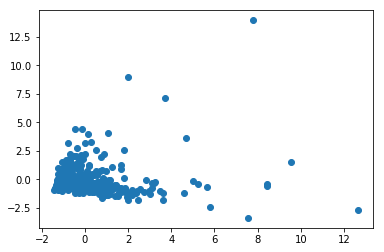

In [42]:
plt.scatter(pca_df[:,0], pca_df[:,1]);

In [43]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44082893, 0.72459292, 0.84793705, 0.94189209])

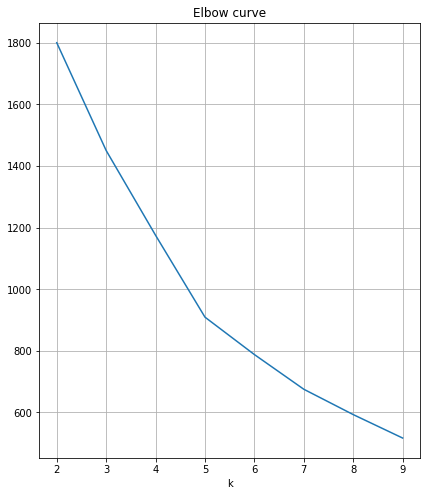

In [85]:
# Specifying the dataset and initializing variables
X = pca_df
distortions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distortions)
plt.grid(True)

As we see above, the optimal number for k is 5. However, given that we know the ground thruth, the number of clusters is only 2

In [89]:
pca_k_means = KMeans(n_clusters=2)
pca_k_means.fit(pca_df)
k_means_preds = pca_k_means.predict(pca_df)

In [90]:
def k_means(X, Y, k=2):
    """This function will calculate and plot k-means clusters for two-dimensional data input as X and Y"""
    from matplotlib import pyplot as plt
    import random
    import numpy as np
    import pandas as pd
    
    fig, ax = plt.subplots(1, 5, figsize = (15, 3))
    ax[0].scatter(X, Y, c='k')
    all_pts = list(zip(X, Y))
    pts = random.sample(all_pts, k)
    arr_pts = np.array(pts)
    ax[1].scatter(X, Y, c='k')
    ax[1].scatter(arr_pts[:, 0], arr_pts[:, 1], c='r')
    
    clusts = []
    for pt in pts:
        clusts.append([pt])
    
    for pt in all_pts:
        dists = []
        for c_pt in pts:
            dists.append(np.linalg.norm(np.array(pt) - np.array(c_pt)))
        dist_min = dists.index(min(dists))
        clusts[dist_min].append(pt)
    
    clusts = [list(set(clust)) for clust in clusts]
    
    # Calculate centroids
    centers = []
    for clust in clusts:
        arr_clust = np.array(clust)
        centers.append((arr_clust[:, 0].mean(), arr_clust[:, 1].mean()))
    
    arr_centers = np.array(centers)
    ax[2].scatter(X, Y, c='k')
    ax[2].scatter(arr_centers[:, 0], arr_centers[:, 1], c='r')
    
    
    new_clusts = []
    for cen in centers:
        new_clusts.append([cen])
    for pt in all_pts:
        dists = []
        for c_pt in centers:
            dists.append(np.linalg.norm(np.array(pt) - np.array(c_pt)))
        dist_min = dists.index(min(dists))
        new_clusts[dist_min].append(pt)
    for i in range(len(centers)):
        if centers[i] not in all_pts:
            new_clusts[i].remove(centers[i])
    
    df = pd.DataFrame(new_clusts).T
    for j in range(len(df.T)):
        points = df[j].dropna()
        ax[2].scatter([i[0] for i in points], [i[1] for i in points])
    
    
    # Are the new clusters different? If so, recalculate centroids!
    verdict = 'done'
    for i in range(len(clusts)):
        if set(clusts[i]) != set(new_clusts[i]):
            verdict = 'not done'
            break
        else:
            continue
    
    while verdict == 'not done':
        old_clusts = new_clusts
        centers = []
        for clust in new_clusts:
            arr_clust = np.array(clust)
            centers.append((arr_clust[:, 0].mean(), arr_clust[:, 1].mean()))
    
        new_clusts = []
        for cen in centers:
            new_clusts.append([cen])
        for pt in all_pts:
            dists = []
            for c_pt in centers:
                dists.append(np.linalg.norm(np.array(pt) - np.array(c_pt)))
            dist_min = dists.index(min(dists))
            new_clusts[dist_min].append(pt)
        for i in range(len(centers)):
            if centers[i] not in all_pts:
                new_clusts[i].remove(centers[i])
        verdict = 'done'
        for i in range(len(clusts)):
            if set(old_clusts[i]) != set(new_clusts[i]):
                verdict = 'not done'
                break
            else:
                continue
    
    last_centers = centers
    arr_last_centers = np.array(last_centers)
    
    ax[3].scatter(X, Y, c='k')
    ax[3].scatter(arr_last_centers[:, 0], arr_last_centers[:, 1], c='r')

    df = pd.DataFrame(new_clusts).T
    

    ax[4].scatter(arr_last_centers[:, 0], arr_last_centers[:, 1], c='r')
    for j in range(len(df.T)):
        points = df[j].dropna()
        ax[4].scatter([i[0] for i in points], [i[1] for i in points])
    
    return df

,0,1
0,"(0.19329054649820243, -0.3050999634513935)","(1.5921090819077042, -0.7410113322068796)"
1,"(0.4344198959454972, -0.3284126225401711)","(4.685654205577527, 3.598678382684399)"
2,"(0.8111432343605398, 0.8150957011888883)","(3.1220916032889465, -0.3300749217937493)"
3,"(-0.778647831923619, 0.652753733909375)","(1.5846641704799675, -1.1292469229805422)"
4,"(0.16628725888001922, 1.271433718314264)","(1.9458622105746584, -1.5666979736395164)"
5,"(-0.15616993189775052, -0.2951409880414285)","(2.8134968943919114, -0.09887393332108459)"
6,"(-0.3352884042775968, -0.5250032583063673)","(1.865319811895263, -0.893604773714601)"
7,"(0.14058643405115298, -0.23099268712632712)","(9.53811612922101, 1.5076371010419194)"
8,"(-0.5173195409242917, -0.659362826613679)","(3.5979048535172233, -1.239366405120676)"
9,"(0.6380859453842896, -0.4018252009827578)","(4.599755905903984, -1.2363758983067659)"


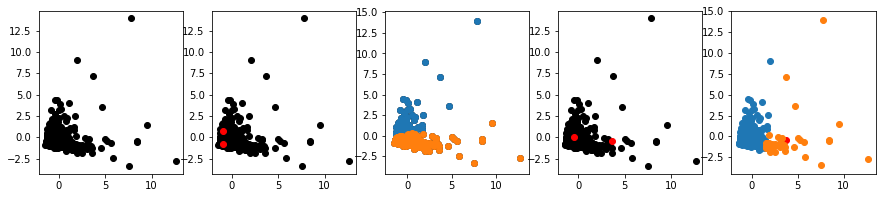

In [91]:
k_means(pca_df[:,0], pca_df[:,1], k=2)

In [92]:
adjusted_rand_score(channels, k_means_preds)

0.19957248499831937

**_Question_**:  What was the Highest Adjusted Rand Score you achieved? Interpret this score, and determine the overall quality of the clustering. Did PCA affect the performance overall?  How many Principal Components resulted in the best overall clustering performance? Why do you think this is?

Write your answer below this line:
_______________________________________________________________________________________________________________________________

The highest ARS should be ~0.23, which suggests that the clusters are better than random chance, but far from perfect.  Overall, the quality of the clustering algorithm did a lot better than the first algorithm we ran on unscaled data. The best performance was achieved when reducing the number of Principal Components down to 4. The increase in model performance is likely due to the reduction in dimensionality. Although dropping the last 2 PCs means that we lose about 6% of our explained variance, this proved to be a net-positive trade-off for the reduction in dimensionality it provided. 

## Summary

In this lab, we used our knowledge of clustering to perform a market segmentation on a real-world dataset. We started with a cluster analysis with poor performance, and then implemented some changes to iteratively improve the performance of the clustering analysis!